# **Inżynieria Uczenia Maszynowego**

Kinga Świderek - 318734

Magdalena Dudek - 318649



Temat
---
*"Nie wszyscy nowo dodawani wykonawcy do naszej bazy mają przypisany gatunek muzyczny – musimy jakoś temu zaradzić!"*

W ramach projektu wcielamy się w rolę analityka pracującego dla portalu „Pozytywka” – serwisu muzycznego, który swoim użytkownikom pozwala na odtwarzanie ulubionych utworów online. Praca na tym stanowisku nie jest łatwa – zadanie dostajemy w formie enigmatycznego opisu i to do nas należy doprecyzowanie szczegółów tak, aby dało się je zrealizować. To oczywiście wymaga zrozumienia problemu, przeanalizowania danych, czasami negocjacji z szefostwem. Same modele musimy skonstruować tak, aby gotowe były do wdrożenia produkcyjnego – pamiętając, że w przyszłości będą pojawiać się kolejne ich wersje, z którymi będziemy eksperymentować. 
Jak każda szanująca się firma internetowa, Pozytywka zbiera dane dotyczące swojej działalności – są to (analitycy mogą wnioskować o dostęp do tych informacji na potrzeby realizacji zadania):
- lista dostępnych artystów i utworów muzycznych, 
- baza użytkowników, 
- historia sesji użytkowników, 
- techniczne informacje dot. poziomu cache dla poszczególnych utworów. 


Określenie problemu biznesowego
---

**Kontekst:**

Portal “Pozytywka” to serwis muzyczny, który swoim użytkownikom pozwala na odtwarzanie ulubionych utworów muzycznych online. W ramach rozbudowy aplikacji firma chce dodać klasyfikacje nowo dodanych wykonawców pod względem gatunku muzycznego.Na ten moment dane te uzupełniane są manualnie przez pracowników firmy, co jest czasochłonne i przez powtarzalność, demotywujące dla wykonawcy czynności. Pozytywka oczekuje, że poprawne działający klasyfikator zwiększy wydajność pracowników oraz pozytywnie wpłynie na zaangażowanie użytkowników(czas spędzony w serwisie), np. poprzez dobrze działające rekomendacje.

**Cel biznesowy:**

Wdrożenie modelu klasyfikacji gatunków muzycznych w serwisie "Pozytywka". Oczekuje się, że efektywny klasyfikator poprawi rekomendacje muzyczne, zwiększając zaangażowanie użytkowników i ich czas spędzony na platformie.

**Biznesowe kryterium sukcesu:**

Zarejestrowanie 20%-owego wzrostu zaangażowania użytkowników, czyli czasu spędzanego na platformie "Pozytywka". Osiągnięcie biznesowego kryterium sukcesu będzie sprawdzane za pomocą Eksperymentu A/B. W eksperymencie zakładamy istnienie komplementarnego systemu rekomendacyjnego wykorzystującego dane zaklasyfikowane za pomocą naszego modelu

Co miesiąc system będzie przydzielał użytkowników do dwóch różnych podgrup (grupy kontrolnej i grupy doświadczalnej). Każdy użytkownik po otrzymaniu przydziału pozostanie w nim dożywotnio, bez możliwości zmienienia przydziału. W rezultacie posiadamy dwie grupy w każdym miesiącu: grupę kontrolną, korzystającą z portalu w sposób niezmieniony oraz grupę doświadczalną, która korzysta z portalu, ale z zastosowaniem naszego modelu. Pod koniec miesiąca zbierane są dane dotyczące czasu spędzanego przez użytkowników w obu grupach. Analiza wyników obejmuje porównanie średnich czasów spędzanych przez obie grupy i użycie testów statystycznych, takich jak t-test, w celu oceny istotności różnic. W przypadku stwierdzenia statystycznie istotnego wzrostu czasu spędzanego w grupie testowej, można wnioskować, że wprowadzenie modelu klasyfikacji przyczyniło się do zwiększenia zaangażowania użytkowników na platformie.


**Analityczne kryterium sukcesu - ocena wydajności technicznej modelu:**

Osiągnięcie minimalnej precyzji klasyfikacji na poziomie 90% w porównaniu do ręcznej klasyfikacji przeprowadzanej przez pracowników. Proces oceny będzie obejmował podział zbioru danych referencyjnych, stworzony przez pracowników, na zbiór treningowy i testowy, po czym dokładność modelu będzie analizowana na zbiorze testowym. **Jeśli model osiągnie precyzję powyżej 90%, projekt jest uznawany za udany; w przeciwnym razie, model może być dostosowany w celu poprawy wyników.**

**Opis zadania modelowania:**

Przygotowanie modelu klasyfikacji na podstawie danych artystów i utworów muzycznych. W ramach zadania zajmujemy się przypisaniem nowo zarejestrowanego artysty do gatunku muzycznego. Celem pośrednim modelu jest znalezienie relacji między parametrami piosenki, a gatunkiem muzycznym.

W pierwszej kolejności dokonujemy agregacji atrybutów i tworzymy z nich wektor cech dla piosenki. Następnie każdy utwór, dodany przez nowo zarejestrowanego artystę, klasyfikujemy do gatunku muzycznego i przypisujemy do artysty ten występujący najczęściej.

Warto podkreślić, że Pozytywka nie dysponuje dedykowanym zestawem danych przypisującym gatunek muzyczny do konkretnych utworów. Zatem, aby skutecznie modelować relacje między utworem a gatunkiem muzycznym, konieczne jest odpowiednie agregowanie zbioru. Najprostszym podejściem jest dziedziczenie gatunku po artyście. Problem w tym rozwiązaniu jest taki, że niektórzy artyści mają przypisany więcej niż jeden gatunek muzyczny, co nie pozwala na jednoznaczne etykietowanie niezbędne w problemach klasyfikacyjnych. Możliwe jest rozwiązanie tego problemu na dwa sposoby:

1. **agregacja na podstawie popularności gatunku:**
Jeżeli artysta ma przypisany więcej niż jeden gatunek muzyczny, w zagregowanym zbiorze danych zostaje przypisany mu ten, który jest globalnie najpopularniejszy. To podejście zostało wykorzystane w kolejnej sekcji dokumentacji - analizie danych;

2. **sposób naiwny wsparty random forest:**
Jeżeli artysta ma przypisany więcej niż jeden gatunek muzyczny np. 3, w zagregowanym zbiorze danych powstaną odpowiednio 3 rekordy dla każdej piosenki, składające się w uproszczeniu z odpowiednich identyfikatorów oraz pojedynczego gatunku np.:


    rekord ze zbioru danych *artists.jsonl*:
    
    | id artysty | imię | ... | gatunek               |
    |------------|------|-----|-----------------------|
    | 1          | Jan  | ... | rock, pop, techno     |

    zagregowany zbiór:

    | id piosenki | id artysty | ... | gatunek |
    |-------------|------------|-----|---------|
    | 1           | 1          | ... | rock    |
    | 1           | 1          | ... | pop     |
    | 1           | 1          | ... | techno  |
    | 2           | 1          | ... | rock    |
    | 2           | 1          | ... | pop     |
    | 2           | 1          | ... | techno  |

    Naiwność tego podejścia polega na tym, że dla tych samych parametrów mamy różne etykiety. Aby zagwarantować spójność danych, w pojedynczym drzewie jedna piosenka będzie mogła wystąpić tylko raz, z jednym przypisanym gatunkiem muzycznym. Zakładamy, że taki mechanizm pozwoli na osiągnięcie izolacji kontekstów, w których dane o tych samych parametrach są analizowane.  

    Nie wykluczamy, że zaproponowane metody agregacji w dalszym rozwoju projektu ulegną zmianie. Zamierzamy przetestować różne podejścia i wyciągnąć wnioski dotyczące ich skuteczności.

**Zasadność selekcji poszczególnych atrybutów piosenki takich jak energy, mode, release_year, przeanalizowana została  w kolejnej części.**

Analiza pierwszego zestawu danych
---
Do stworzenia podstawowego modelu będziemy korzystać z danych z plików:
- *artists.jsonl*
- *tracks.jsonl*


#### *artists.jsonl*
Plik *artists.jsonl* zawiera dane o artystach:

In [1]:
import pandas as pd

PATH_ARTISTS = "data/v1/artists.jsonl"
artists_df = pd.read_json(PATH_ARTISTS, lines=True)
artists_df

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,None
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,-1,Vishal Mishra,"[desi pop, modern bollywood]"
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
...,...,...,...
27645,3yMpPk98o4yrKhUr9rB0yY,Sheikh Mahmood Ali Bana,[islamic recitation]
27646,5ICqrGUqDv9KZdbbFiNGma,Jay Tholen,[chiptune]
27647,-1,A.R. Kane,"[dream pop, nu gaze, shoegaze]"
27648,4iS19hLpsgRd8jLPKI4Ni3,Blissonic,[thai indie]


Poniższy kod sprawdza ilość nieznanych danych (null):

In [2]:
num_artists = artists_df.shape[0]
artists_null_values = num_artists - artists_df.count()
artists_null_values

id           0
name         0
genres    5579
dtype: int64

W kolumnie id jest dużo powtarzających się wartości -1:

In [3]:
artists_ids_count = artists_df["id"].value_counts()
artists_ids_count

id
-1                        5633
72578usTM6Cj5qWsi471Nc       1
0IecGJbdBeYSOVtSPRehh5       1
6C65D20ASusYqHGSIktfED       1
35iymrFS4VnsKn35ebHKX9       1
                          ... 
0mWQOAjoHzqSNxwbGg4tf2       1
2bHrkZwj7sYYsMHe5tHXaX       1
2BXEG2yarazI9hY5ZsHJaQ       1
3Hl3dCaBcrnvBAOMAW4nJR       1
3JGC3LkYrwlrTscixVwY72       1
Name: count, Length: 22018, dtype: int64

Wartości procentowe:

In [4]:
id_invalid = artists_ids_count[-1]
genres_null = artists_null_values["genres"]

print(f"Artists with invalid id: {id_invalid} ({round(id_invalid/num_artists * 100, 2)}%)")
print(f"Artists with null genres: {genres_null} ({round(genres_null/num_artists * 100, 2)}%)")

Artists with invalid id: 5633 (20.37%)
Artists with null genres: 5579 (20.18%)


### *tracks.jsonl*
Plik *tracks.jsonl* zawiera dane o piosenkach. 

In [5]:
PATH_TRACKS = "data/v1/tracks.jsonl"
tracks_df = pd.read_json(PATH_TRACKS, lines=True)
tracks_df

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40.0,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.1190,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,None,NaN,254733,0,None,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.9560,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,None,45.0,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.1280,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6.0,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.1720,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19.0,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.2410,0.317,100.041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,6I2q7ZIY7QX3sWOmuJjhph,Mit akarsz a boldogságtól,25.0,279427,0,7pZH7c4HbKE0ONErpw9cjP,1996,0.693,0.9300,11,NaN,-6.236,0.0368,0.08030,0.008070,0.1570,0.745,139.974,4
129644,None,None,NaN,244960,0,7jy3rLJdDQY21OgRLCZ9sD,2007-09-25,0.596,0.5570,0,NaN,-6.401,0.0299,0.02700,0.000016,0.0914,0.314,124.023,4
129645,4yFeqGWRt2Z10E2ECWG5I2,Kortit kertoo kohtalomme,18.0,246333,0,None,1988-12-04,0.386,0.4920,2,NaN,-11.271,0.0347,0.61000,0.000000,0.3030,0.648,167.668,4
129646,7dJgMpT6LzQTlLMEuoapq2,Believe in Love (2015 - Remaster),22.0,323613,0,None,1988-04-15,0.471,0.7650,3,NaN,-4.406,0.0323,0.06680,0.082000,0.1280,0.353,132.537,4


Poniższy kod sprawdza ilość wartości nieznanych dla każdej kolumny:

In [6]:
num_tracks = tracks_df.shape[0]
tracks_null_values = num_tracks - tracks_df.count()
tracks_null_values

id                   25731
name                 25966
popularity           25965
duration_ms              0
explicit                 0
id_artist            26164
release_date             0
danceability             0
energy                   0
key                      0
mode                103719
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

W tym przypadku nie ma powtarzających się wartości id:

In [7]:
tracks_df["id"].value_counts()

id
6C0WWu7RYKbAgWUI3YC0sT    1
4K0zhmxo4LggWUZQpcUeQJ    1
5aMjT49axHnvYEsFDsasca    1
4UmdaZg7BWgMn0JltimVnu    1
5NPBB71WcCbXOPIoToikmh    1
                         ..
1EN7VtkPTmCd2oa6VEMfGH    1
3MKdiIVkYHpvJcXrL7bLUE    1
2E0S7wrBzD4q0Ugjr0YXnr    1
3k1fRAaUFBPMNkulplHupK    1
7dJgMpT6LzQTlLMEuoapq2    1
Name: count, Length: 103917, dtype: int64

Nie ma również żadnych wartości -1 w kolumnie *id_artist*:

In [8]:
(tracks_df["id_artist"] == -1).sum()

0

Wartości procentowe:

In [9]:
id_nulls = tracks_null_values["id"]
name_nulls = tracks_null_values["name"]
popularity_nulls = tracks_null_values["popularity"]
artist_id_nulls = tracks_null_values["id_artist"]
mode_nulls = tracks_null_values["mode"]

print(f"Tracks with null id: {id_nulls} ({round(id_nulls/num_tracks * 100, 2)}%)")
print(f"Tracks with null name: {name_nulls} ({round(name_nulls/num_tracks * 100, 2)}%)")
print(f"Tracks with null popularity: {popularity_nulls} ({round(popularity_nulls/num_tracks * 100, 2)}%)")
print(f"Tracks with null artist id: {artist_id_nulls} ({round(artist_id_nulls/num_tracks * 100, 2)}%)")
print(f"Tracks with null mode: {mode_nulls} ({round(mode_nulls/num_tracks * 100)}%)")

Tracks with null id: 25731 (19.85%)
Tracks with null name: 25966 (20.03%)
Tracks with null popularity: 25965 (20.03%)
Tracks with null artist id: 26164 (20.18%)
Tracks with null mode: 103719 (80%)


### Analiza drugiego zestawu danych

#### *artists.jsonl*

In [10]:
PATH_ARTISTS = "data/v2/artists.jsonl"
artists_df = pd.read_json(PATH_ARTISTS, lines=True)
artists_df

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"[desi pop, modern bollywood]"
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
...,...,...,...
27645,3yMpPk98o4yrKhUr9rB0yY,Sheikh Mahmood Ali Bana,[islamic recitation]
27646,5ICqrGUqDv9KZdbbFiNGma,Jay Tholen,[chiptune]
27647,7JXwnoNAAY276k8wZVmpYf,A.R. Kane,"[dream pop, nu gaze, shoegaze]"
27648,4iS19hLpsgRd8jLPKI4Ni3,Blissonic,[thai indie]


Zaczynamy od sprawdzenia ilości wartości nieznanych (null):

In [11]:
num_artists = artists_df.shape[0]
artists_null_values = num_artists - artists_df.count()
artists_null_values

id        0
name      0
genres    0
dtype: int64

Następnym problemem były powtarzające się wartości -1 w polu *id*:

In [12]:
artists_ids_count = artists_df["id"].value_counts()
artists_ids_count

id
72578usTM6Cj5qWsi471Nc    1
0fYPQBOx0vsRMmjUba9HgF    1
60alJNnwGVBdNXrx4kOfW0    1
0ZXKT0FCsLWkSLCjoBJgBX    1
0t8lKcdJV0dEicuocOteOw    1
                         ..
07Asx51VtMw5kbNXKrpZlq    1
7dSisSXIg7tDRFTxjaWY0c    1
3wOsYKZM0zcKNasi3I7fP4    1
1UAzmnFgjizIDvtHvnCdEq    1
3JGC3LkYrwlrTscixVwY72    1
Name: count, Length: 27650, dtype: int64

Wszystkie wartości *id* są w tym zestawie unikalne.

Poniższy kod rozdziela wszystkie gatunki muzyczne, występujące w zbiorze danych. Każdy wiersz odpowiada jednemu artyście. Reprezentowane przez niego gatunki muzyczne są oznaczone jedynką, natomiast reszta - zerem.

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_df = pd.DataFrame(mlb.fit_transform(artists_df['genres']),
                         columns=mlb.classes_,
                         index=artists_df["id"])
genres_df

,48g,a cappella,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,acid rock,acid techno,...,zespol dzieciecy,zhongguo feng,zikir,zillertal,zim urban groove,zolo,zouglou,zouk,zouk riddim,zydeco
id,,,,,,,,,,,,,,,,,,,,,
72578usTM6Cj5qWsi471Nc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7b6Ui7JVaBDEfZB9k6nHL0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5wJ1H6ud777odtZl5gG507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0n4a5imdLBN24fIrBWoqrv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4gdMJYnopf2nEUcanAwstx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3yMpPk98o4yrKhUr9rB0yY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ICqrGUqDv9KZdbbFiNGma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7JXwnoNAAY276k8wZVmpYf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


W powyższej tabeli widać rozdzielnie gatunek "accordeon" i "accordion" - prawdopodobnie odnosi się to do tego samego gatunku, ale zapisane jest w innym języku. Jeśli w danych jest dużo przypadków takich niespójności (trudne do zbadania), może to negatywnie wpłynąć na jakość naszego modelu. Widać również kategorię "zespół dziecięcy", co może potwierdzać teorię, że artyści reprezentujący te same kategorie są rozdzieleni na różne tłumaczenia gatunków.

In [14]:
count_genres_popularity = genres_df.sum()
sorted_count_genres_popularity = count_genres_popularity.sort_values(ascending=False)
sorted_count_genres_popularity

rock                  498
dance pop             399
pop                   371
latin                 356
country rock          337
                     ... 
sinogaze                1
german opera            1
chinese soundtrack      1
chinese post-rock       1
grisly death metal      1
Length: 3953, dtype: int64

Z 3953 różnych gatunków muzycznych, 790 jest przypisane do tylko jednego artysty:

In [15]:
len(count_genres_popularity[count_genres_popularity == 1])

790

Ponadto, większość gatunków występuje 5 razy lub mniej:

In [16]:
len(count_genres_popularity[count_genres_popularity <= 5])

2054

Jest to ponad połowa wszystkich naszych danych:

In [17]:
len(count_genres_popularity[count_genres_popularity <= 5])/len(count_genres_popularity)

0.5196053630154314

Histogram:

<Axes: >

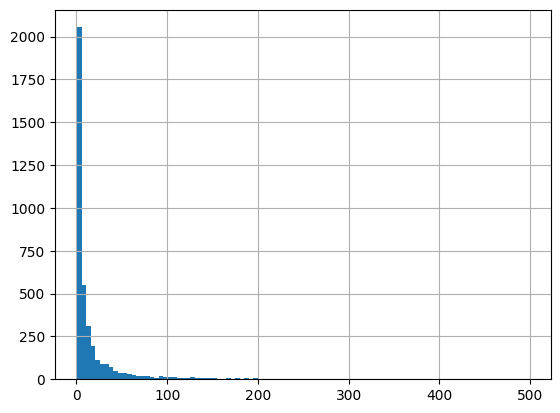

In [18]:
count_genres_popularity.hist(bins=100)

#### *tracks.jsonl*


In [19]:
PATH_TRACKS = "data/v2/tracks.jsonl"
tracks_df = pd.read_json(PATH_TRACKS, lines=True)
tracks_df

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.1190,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.9560,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.1280,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.1720,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.2410,0.317,100.041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,6I2q7ZIY7QX3sWOmuJjhph,Mit akarsz a boldogságtól,25,279427,0,7pZH7c4HbKE0ONErpw9cjP,1996,0.693,0.9300,11,NaN,-6.236,0.0368,0.08030,0.008070,0.1570,0.745,139.974,4
129644,2XvrMHbSO077Ajg7QTTNdY,Let It Die,58,244960,0,7jy3rLJdDQY21OgRLCZ9sD,2007-09-25,0.596,0.5570,0,NaN,-6.401,0.0299,0.02700,0.000016,0.0914,0.314,124.023,4
129645,4yFeqGWRt2Z10E2ECWG5I2,Kortit kertoo kohtalomme,18,246333,0,6GzV7OET1fJmHRgSLW2pwR,1988-12-04,0.386,0.4920,2,NaN,-11.271,0.0347,0.61000,0.000000,0.3030,0.648,167.668,4
129646,7dJgMpT6LzQTlLMEuoapq2,Believe in Love (2015 - Remaster),22,323613,0,27T030eWyCQRmDyuvr1kxY,1988-04-15,0.471,0.7650,3,NaN,-4.406,0.0323,0.06680,0.082000,0.1280,0.353,132.537,4


Sprawdzenie ilość wartości nieznanych (null):

In [20]:
num_tracks = tracks_df.shape[0]
tracks_null_values = num_tracks - tracks_df.count()
tracks_null_values

id                       0
name                     0
popularity               0
duration_ms              0
explicit                 0
id_artist                0
release_date             0
danceability             0
energy                   0
key                      0
mode                103719
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

Poza polem *mode*, nie ma braków w danych.

Sprawdzenie poprawności pola "id":

In [21]:
tracks_df["id"].value_counts()

id
6C0WWu7RYKbAgWUI3YC0sT    1
6uGllanaOEl5aMRSZXrXJL    1
78RrrUc92SAfUmOsZXRWrx    1
52XYwQKlXp7scE7KrBBCID    1
3HliZf9u2g7RCbbkUGekvZ    1
                         ..
2hw47GMKL6LXwp5BJgPxXf    1
1rktgi2hNfNisWZsgvxLsR    1
2p1Hcs5ClTIMBj0mDV0ytf    1
4oaIQGZBqIzRG5mCb3Sbzr    1
3z0mwmDWHXiZWpCptxttnM    1
Name: count, Length: 129648, dtype: int64

W danych wszystkie identyfikatory są unikalne.

Należy również sprawdzić, czy wszystkie pola *id_artist* w pliku *tracks.jsonl* odpowiadają artsytom z pliku *artists.jsonl*. Poniższy kod łączy obiekty DataFrame na podstawie *id* artysty:

In [22]:
tracks_artists_df = pd.merge(tracks_df, artists_df, left_on='id_artist', right_on='id', how='left', suffixes=("_track", "_artist"))
tracks_artists_df = tracks_artists_df.drop("id_artist", axis=1)
tracks_artists_df

,id_track,name_track,popularity,duration_ms,explicit,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,name_artist,genres
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40,249573,1,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.1190,0.633,97.865,4,Fabri Fibra,"[italian hip hop, italian pop, rap napoletano]"
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34,254733,0,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.9560,0.284,116.685,4,Wings,"[album rock, art rock, beatlesque, classic roc..."
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45,279347,0,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.1280,0.301,159.872,3,Angra,"[brazilian metal, brazilian power metal, brazi..."
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6,193707,0,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.1720,0.340,85.012,4,The Ink Spots,"[adult standards, lounge, swing, vocal harmony..."
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19,182120,0,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.2410,0.317,100.041,4,閻荷婷,[vintage taiwan pop]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,6I2q7ZIY7QX3sWOmuJjhph,Mit akarsz a boldogságtól,25,279427,0,1996,0.693,0.9300,11,NaN,-6.236,0.0368,0.08030,0.008070,0.1570,0.745,139.974,4,Zámbó Jimmy,"[classic hungarian pop, classic hungarian rock]"
129644,2XvrMHbSO077Ajg7QTTNdY,Let It Die,58,244960,0,2007-09-25,0.596,0.5570,0,NaN,-6.401,0.0299,0.02700,0.000016,0.0914,0.314,124.023,4,Foo Fighters,"[alternative metal, alternative rock, modern r..."
129645,4yFeqGWRt2Z10E2ECWG5I2,Kortit kertoo kohtalomme,18,246333,0,1988-12-04,0.386,0.4920,2,NaN,-11.271,0.0347,0.61000,0.000000,0.3030,0.648,167.668,4,Lea Laven,"[classic finnish pop, classic iskelma, finnish..."
129646,7dJgMpT6LzQTlLMEuoapq2,Believe in Love (2015 - Remaster),22,323613,0,1988-04-15,0.471,0.7650,3,NaN,-4.406,0.0323,0.06680,0.082000,0.1280,0.353,132.537,4,Scorpions,"[album rock, german hard rock, german metal, g..."


Jeśli istnieją piosenki, których *id_artist* nie koresponduje z żadnym *id* w pliku *artists.jsonl*, w wynikowej tabeli w polu *name_artist* będziemy mieć wartości null:

In [23]:
tracks_null_artist = num_tracks - tracks_artists_df["name_artist"].count()
tracks_null_artist

0

Zatem wszystkie pola *id_artist* przyjmują dozwolone wartości.

Następnie przyjrzymy się histogramom wszystkich istotnych atrybutów:

1. *popularity*

Max popularity: 97
Min popularity: 0
Mean popularity: 29.70743860298655


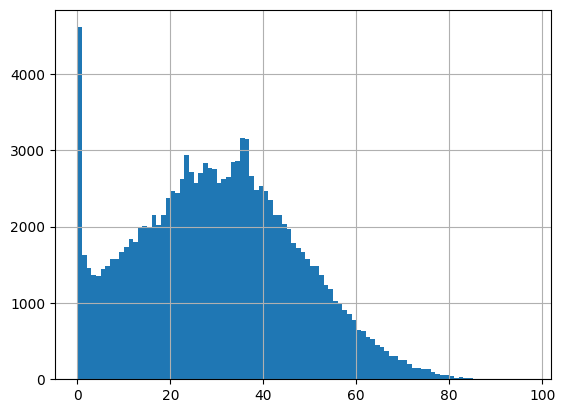

In [24]:
tracks_artists_df["popularity"].hist(bins=97)
print(f"Max popularity: {tracks_artists_df['popularity'].max()}")
print(f"Min popularity: {tracks_artists_df['popularity'].min()}")
print(f"Mean popularity: {tracks_artists_df['popularity'].mean()}")

2. *duration_ms*

Max duration: 67 min 8 s


Min duration: 4 s
Mean duration: 3 min 48 s


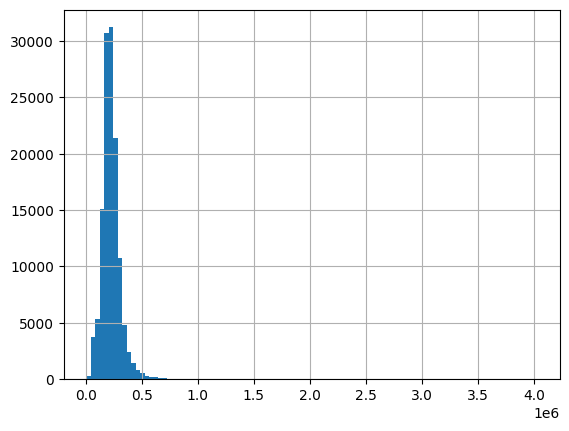

In [25]:
tracks_artists_df["duration_ms"].hist(bins=100)
max_time = tracks_artists_df['duration_ms'].max()
print(f"Max duration: {max_time//60_000} min {round((max_time/1000)%60)} s")
min_time = tracks_artists_df['duration_ms'].min()
print(f"Min duration: {round(min_time/1000)} s")
mean_time = tracks_artists_df['duration_ms'].mean()
print(f"Mean duration: {round(mean_time//60_000)} min {round((mean_time/1000)%60)} s")

Jest znaczna różnica między maksymalnym czasem trwania piosenki a średnim. Ilość piosenek dłuższych niż 15 minut:

In [26]:
len(tracks_artists_df[tracks_artists_df["duration_ms"] > 900000])

311

Jest to mniej niż 1% wszystkich naszych danych. Histogram ograniczony do piosenek krótszych niż 15 minut ma rozkład zbliżony do normalnego:

<Axes: >

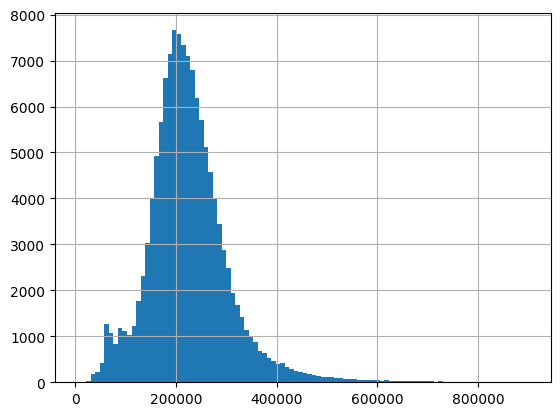

In [27]:
tracks_artists_df[tracks_artists_df["duration_ms"] < 900000]["duration_ms"].hist(bins=100)

3. *explicit*

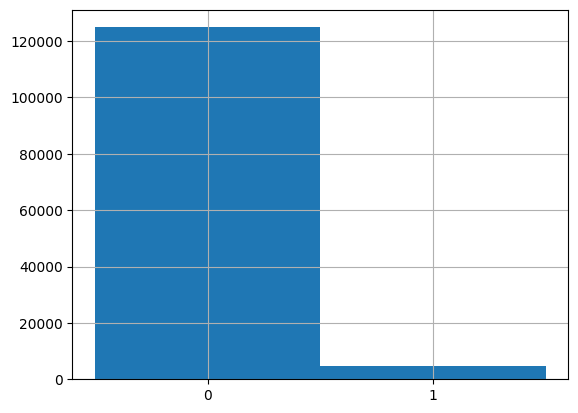

In [28]:
import matplotlib.pyplot as plt
tracks_artists_df["explicit"].hist(bins=[-0.5, 0.5, 1.5])
plt.xticks([0, 1])
plt.show()

4. *release_date*

Daty są zapisane w niespójny sposób: niektóre są reprezentowane w formacie YYYY-MM-DD, a niektóre: YYYY. W celu analizy, stworzę dodatkową kolumnę *release_year*, która będzie przechowywała daty w formacie YYYY:

In [29]:
tracks_artists_df["release_year"] = tracks_artists_df["release_date"].str.extract(r'(\d{4})')
tracks_artists_df['release_year'] = pd.to_numeric(tracks_artists_df['release_year'], errors='coerce')
tracks_artists_df

,id_track,name_track,popularity,duration_ms,explicit,release_date,danceability,energy,key,mode,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,name_artist,genres,release_year
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40,249573,1,2004-09-01,0.727,0.6630,4,0.0,...,0.2770,0.08010,0.000000,0.1190,0.633,97.865,4,Fabri Fibra,"[italian hip hop, italian pop, rap napoletano]",2004
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34,254733,0,1976-12-10,0.444,0.3480,5,1.0,...,0.0321,0.65600,0.003740,0.9560,0.284,116.685,4,Wings,"[album rock, art rock, beatlesque, classic roc...",1976
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45,279347,0,2001,0.273,0.8990,6,1.0,...,0.0499,0.00177,0.000006,0.1280,0.301,159.872,3,Angra,"[brazilian metal, brazilian power metal, brazi...",2001
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6,193707,0,1961-10-15,0.628,0.0616,0,1.0,...,0.0558,0.78400,0.000009,0.1720,0.340,85.012,4,The Ink Spots,"[adult standards, lounge, swing, vocal harmony...",1961
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19,182120,0,1970-01-11,0.353,0.0663,8,0.0,...,0.0445,0.95800,0.000446,0.2410,0.317,100.041,4,閻荷婷,[vintage taiwan pop],1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,6I2q7ZIY7QX3sWOmuJjhph,Mit akarsz a boldogságtól,25,279427,0,1996,0.693,0.9300,11,NaN,...,0.0368,0.08030,0.008070,0.1570,0.745,139.974,4,Zámbó Jimmy,"[classic hungarian pop, classic hungarian rock]",1996
129644,2XvrMHbSO077Ajg7QTTNdY,Let It Die,58,244960,0,2007-09-25,0.596,0.5570,0,NaN,...,0.0299,0.02700,0.000016,0.0914,0.314,124.023,4,Foo Fighters,"[alternative metal, alternative rock, modern r...",2007
129645,4yFeqGWRt2Z10E2ECWG5I2,Kortit kertoo kohtalomme,18,246333,0,1988-12-04,0.386,0.4920,2,NaN,...,0.0347,0.61000,0.000000,0.3030,0.648,167.668,4,Lea Laven,"[classic finnish pop, classic iskelma, finnish...",1988
129646,7dJgMpT6LzQTlLMEuoapq2,Believe in Love (2015 - Remaster),22,323613,0,1988-04-15,0.471,0.7650,3,NaN,...,0.0323,0.06680,0.082000,0.1280,0.353,132.537,4,Scorpions,"[album rock, german hard rock, german metal, g...",1988


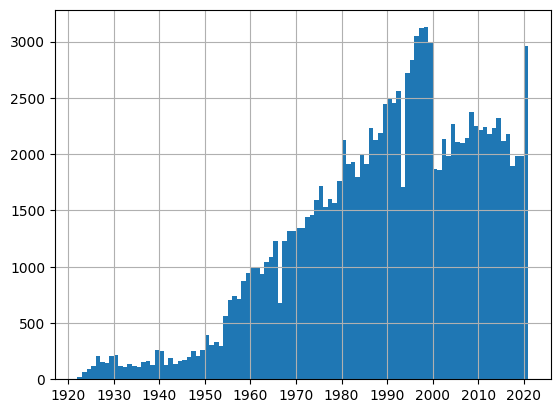

In [30]:
oldest_song_year = tracks_artists_df["release_year"].min()
newest_song_year = tracks_artists_df["release_year"].max() 
years_range = range(oldest_song_year-2, newest_song_year, 10)
tracks_artists_df["release_year"].hist(bins=(newest_song_year-oldest_song_year))
plt.xticks(years_range)
plt.show()

5. *danceability*

Max danceability: 0.985
Min danceability: 0.0
Mean danceability: 0.564818545600395


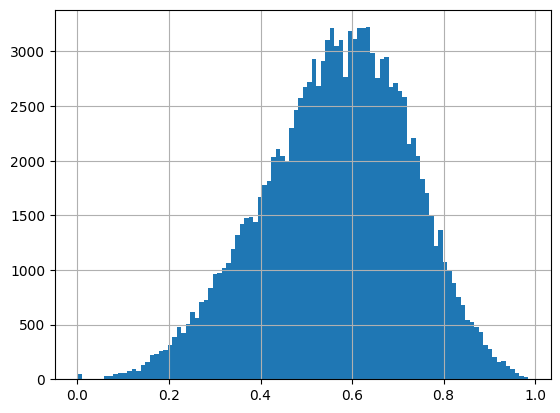

In [31]:
tracks_artists_df["danceability"].hist(bins=100)
print(f"Max danceability: {tracks_artists_df['danceability'].max()}")
print(f"Min danceability: {tracks_artists_df['danceability'].min()}")
print(f"Mean danceability: {tracks_artists_df['danceability'].mean()}")

6. *energy*

Max energy: 1.0


Min energy: 0.0
Mean energy: 0.5628128821393312


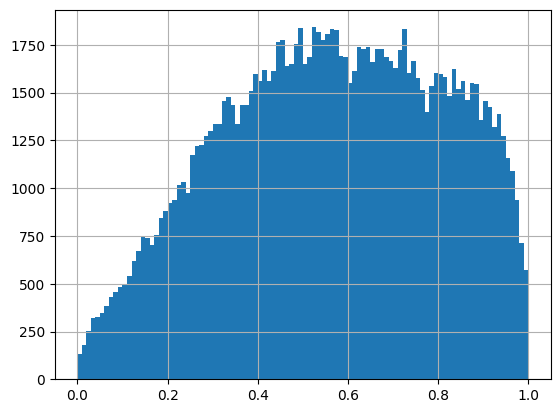

In [32]:
tracks_artists_df["energy"].hist(bins=100)
print(f"Max energy: {tracks_artists_df['energy'].max()}")
print(f"Min energy: {tracks_artists_df['energy'].min()}")
print(f"Mean energy: {tracks_artists_df['energy'].mean()}")

7. *key*

Wartość dyskretna z wartościami od 0 do 11

<Axes: xlabel='key'>

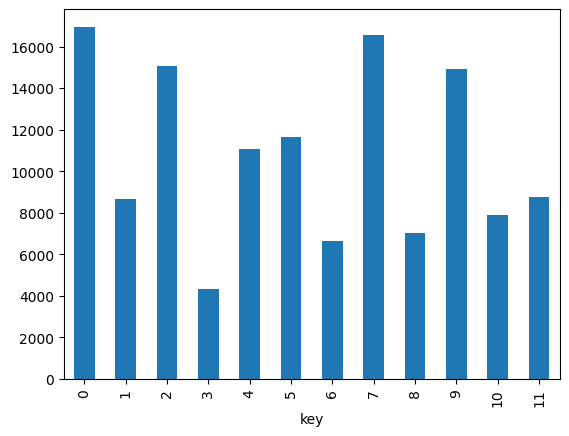

In [33]:
tracks_artists_df["key"].value_counts().sort_index().plot(kind="bar")

8. *mode*

Atrybut dyskretny o wartościach 0 (skala mol) i 1 (skala dur). W większości wierszy brakuje danych w tej kolumnie.

<Axes: xlabel='mode'>

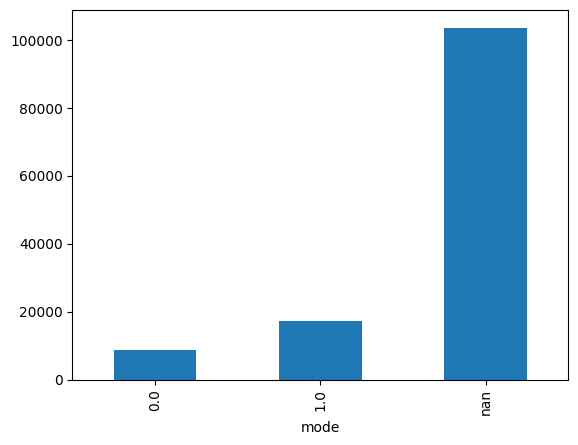

In [34]:
tracks_artists_df["mode"].value_counts(dropna=False).sort_index().plot(kind="bar")

9. *loudness*

Max loudness: 4.362
Min loudness: -60.0
Mean loudness: -9.736491029556955


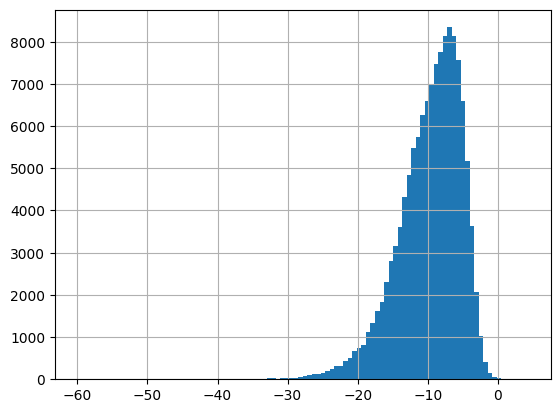

In [35]:

tracks_artists_df["loudness"].hist(bins=100)
print(f"Max loudness: {tracks_artists_df['loudness'].max()}")
print(f"Min loudness: {tracks_artists_df['loudness'].min()}")
print(f"Mean loudness: {tracks_artists_df['loudness'].mean()}")

10. *speechiness*

Max speechiness: 0.968
Min speechiness: 0.0


Mean speechiness: 0.09543769900037023


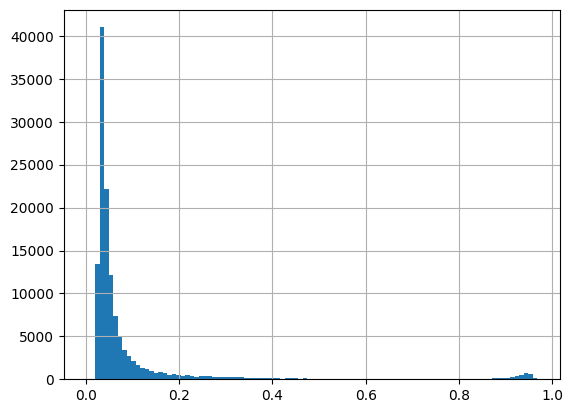

In [36]:
tracks_artists_df["speechiness"].hist(bins=100)
print(f"Max speechiness: {tracks_artists_df['speechiness'].max()}")
print(f"Min speechiness: {tracks_artists_df['speechiness'].min()}")
print(f"Mean speechiness: {tracks_artists_df['speechiness'].mean()}")

11. *acousticness*

Max acousticness: 0.996


Min acousticness: 0.0
Mean acousticness: 0.41754703251696906


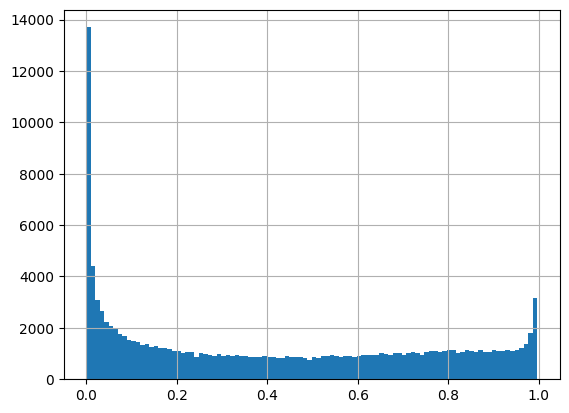

In [37]:
tracks_artists_df["acousticness"].hist(bins=100)
print(f"Max acousticness: {tracks_artists_df['acousticness'].max()}")
print(f"Min acousticness: {tracks_artists_df['acousticness'].min()}")
print(f"Mean acousticness: {tracks_artists_df['acousticness'].mean()}")

12. *instrumentalness*

Max instrumentalness: 1.0


Min instrumentalness: 0.0
Mean instrumentalness: 0.08627857818277182


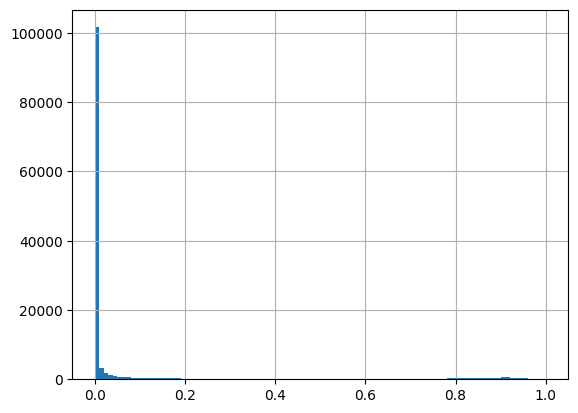

In [38]:
tracks_artists_df["instrumentalness"].hist(bins=100)
print(f"Max instrumentalness: {tracks_artists_df['instrumentalness'].max()}")
print(f"Min instrumentalness: {tracks_artists_df['instrumentalness'].min()}")
print(f"Mean instrumentalness: {tracks_artists_df['instrumentalness'].mean()}")

13. *liveness*

Max liveness: 1.0
Min liveness: 0.0
Mean liveness: 0.21431048006911027


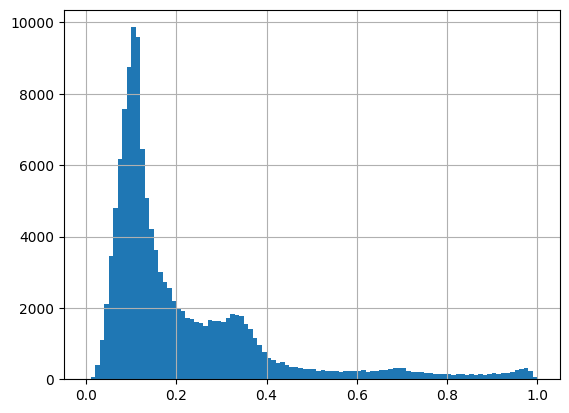

In [39]:
tracks_artists_df["liveness"].hist(bins=100)
print(f"Max liveness: {tracks_artists_df['liveness'].max()}")
print(f"Min liveness: {tracks_artists_df['liveness'].min()}")
print(f"Mean liveness: {tracks_artists_df['liveness'].mean()}")

14. *valence*

Max valence: 1.0
Min valence: 0.0
Mean valence: 0.5629259489540911


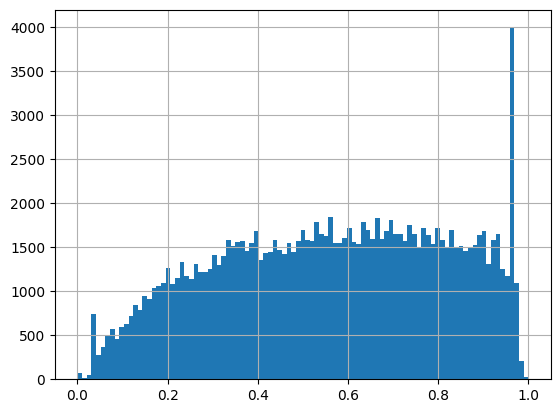

In [40]:
tracks_artists_df["valence"].hist(bins=97)
print(f"Max valence: {tracks_artists_df['valence'].max()}")
print(f"Min valence: {tracks_artists_df['valence'].min()}")
print(f"Mean valence: {tracks_artists_df['valence'].mean()}")

15. *tempo*

Max tempo: 243.507
Min tempo: 0.0
Mean tempo: 119.55657189466862


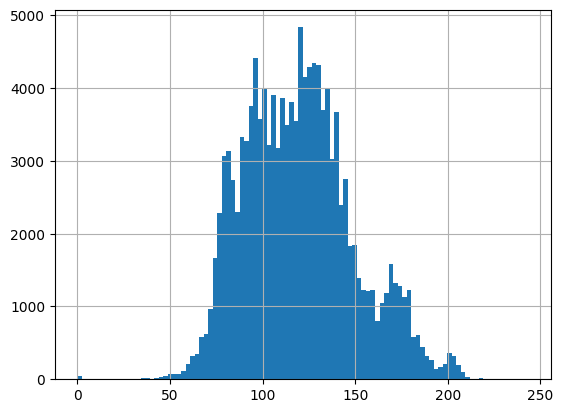

In [41]:
tracks_artists_df["tempo"].hist(bins=100)
print(f"Max tempo: {tracks_artists_df['tempo'].max()}")
print(f"Min tempo: {tracks_artists_df['tempo'].min()}")
print(f"Mean tempo: {tracks_artists_df['tempo'].mean()}")

16. *time_signature*

<Axes: xlabel='time_signature'>

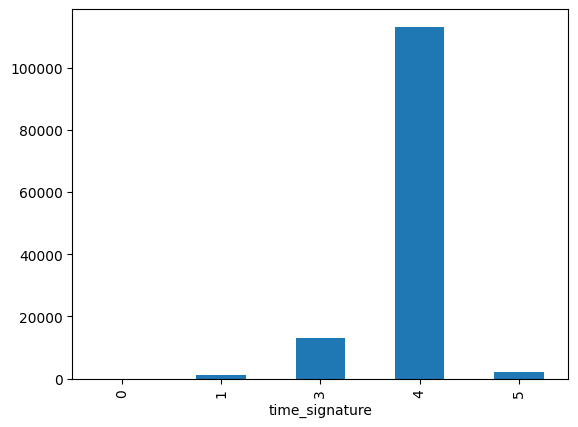

In [42]:
tracks_artists_df["time_signature"].value_counts().sort_index().plot(kind="bar")

Aby dokonać selekcji atrybutów należy zbadać współczynnik korelacji dla atrybutów ciągłych oraz współczynnik informacji wzajemnej.

<Axes: >

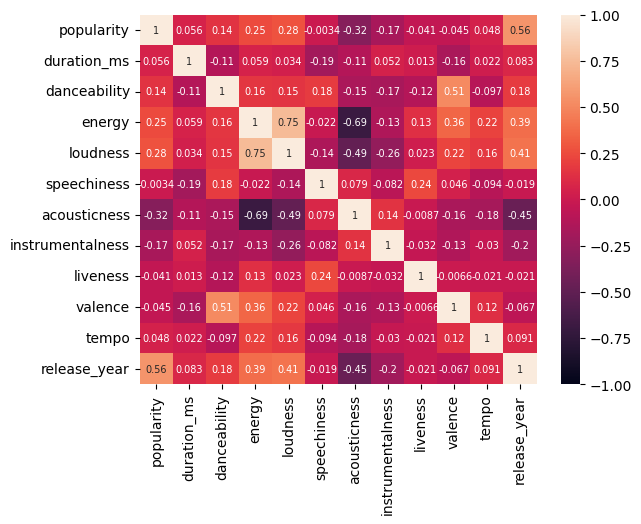

In [43]:
import seaborn as sns

continuous_df = tracks_artists_df.drop(["id_track", "name_track", "explicit", "release_date", "key", "mode", "time_signature", "name_artist", "genres"], axis=1)
correlation = continuous_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize": 7})

Największy współczynnik korelacji jest między atrybutami *loudness* a *energy*. Jest też silna korelacja ujemna między *acousticness* i *energy*. Potencjalnie atrybut *energy* może zostać pominięty. 

Współczynnik informacji wzajemnej między atrybutami a zmienną celu (gatunek muzyczny) zostanie wyznaczony na dwa sposoby:

1. Lista gatunków zostanie zagregowana do jednego stringa:

In [44]:
from sklearn.feature_selection import mutual_info_classif

mi_df = tracks_artists_df.drop(["id_track", "name_track", "release_date", "mode", "name_artist", "genres"], axis=1)
genres = tracks_artists_df["genres"].apply(lambda x: " ".join(x))
mi_matrix = mutual_info_classif(mi_df, genres)
mi_matrix

array([0.73304048, 0.57075741, 0.1276342 , 0.34923775, 0.4780881 ,
       0.15599255, 0.51240997, 0.42579185, 0.61648112, 0.36664186,
       0.17630763, 0.29733589, 0.29249259, 1.12081537, 1.86444205])

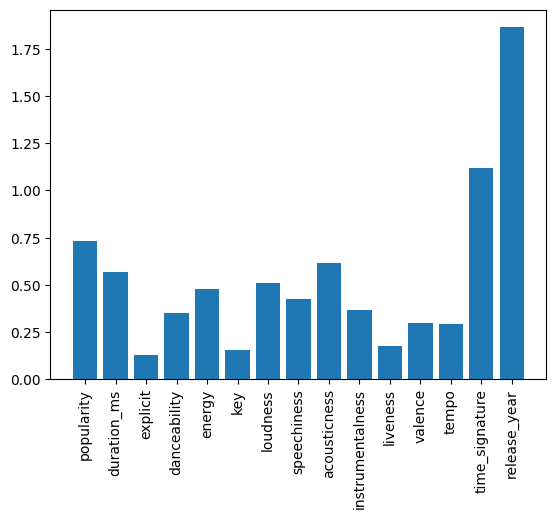

In [45]:
plt.bar(mi_df.columns, mi_matrix)
plt.xticks(rotation=90)
plt.show()

2. Z listy gatunków zostanie wybrany najpopularniejszy gatunek, który będzie reprezentował daną piosenkę:

In [46]:
def find_most_popular_genre(row):
    def popularity(genre):
        return count_genres_popularity[genre]
    return max(row, key=popularity)

genres = tracks_artists_df["genres"].apply(find_most_popular_genre)
genres

0               italian hip hop
1                          rock
2                         metal
3               adult standards
4            vintage taiwan pop
                  ...          
129643    classic hungarian pop
129644                     rock
129645          classic iskelma
129646                     rock
129647              turkish pop
Name: genres, Length: 129648, dtype: object

In [47]:
mi_matrix = mutual_info_classif(mi_df, genres)
mi_matrix

array([0.44608156, 0.35845412, 0.07320764, 0.17772664, 0.25621762,
       0.05825553, 0.25092583, 0.27783747, 0.36934988, 0.21953132,
       0.09289772, 0.15053496, 0.19476348, 0.1916939 , 0.8306744 ])

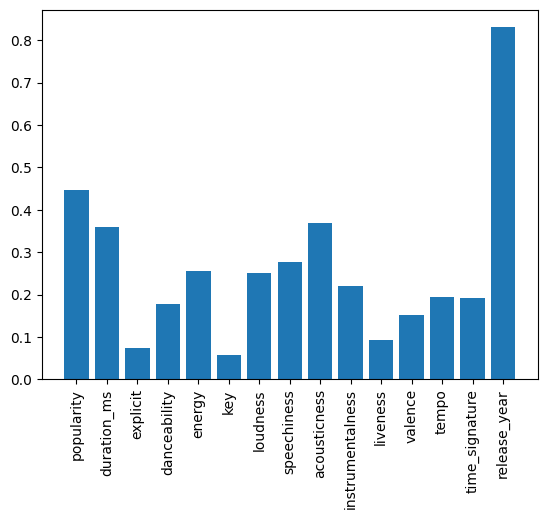

In [48]:
plt.bar(mi_df.columns, mi_matrix)
plt.xticks(rotation=90)
plt.show()

Pomimo zróżnicowanej metody, widać podobieństwa na obu wykresach - największy wpływ na gatunek muzyczny ma *release_year*, a najmniejszy - *key*.

### Modelowanie wstępne

Przed przystąpieniem do modelowania należy ograniczyć wielkość zbioru gatunków muzycznych. W tym celu trzeba:
1. Zagregować podobne gatunki do jednej kategorii (np. *greek drill* i *turkish drill* do *drill*) - będziemy to robić tylko dla gatunków mniej popularnych, ponieważ w przypadku popularniejszych gatunków podział ten jest potencjalnie bardziej znaczący.
2. Połączyć te gatunki, które reprezentują te samą kategorię, ale zapisaną w innym języku.
3. Usunąć te gatunki, które mają za mało reprezentantów - w przypadku, gdyby jakiś artysta miał w wyniku takiej selekcji zostać bez żadnego gatunku muzycznego, zostanie mu przypisany gatunek *other*.

#### Ad 1. Agregowanie podobnych gatunków

Wszystkie gatunki z mniej niż 100 reprezentantami będą potencjalnie agregowane.

In [49]:
unpopular_genres = sorted_count_genres_popularity[sorted_count_genres_popularity < 100]
unpopular_genres

trap                  99
rhythm and blues      99
glam metal            99
experimental          99
dangdut               98
                      ..
sinogaze               1
german opera           1
chinese soundtrack     1
chinese post-rock      1
grisly death metal     1
Length: 3767, dtype: int64

Znalezione zostaną wszystkie możliwe permutacje (o zmiennej długości) nazw gatunków muzycznych. Jeśli jedna z tych permutacji jest nazwą innego gatunku, gatunki te zostaną połączone.

In [50]:
from itertools import permutations

all_permutations = {}
for genre in unpopular_genres.keys():
    all_permutations.setdefault(genre, [])
    split_genre = genre.split()
    for i in range(1, len(split_genre) + 1):
        length_permutations = permutations(split_genre, i)
        all_permutations[genre].extend([" ".join(genre) for genre in length_permutations])

In [51]:
genre_mappings = {}
for unpopular_genre, genre_permutations in all_permutations.items():
    genre_mappings.setdefault(unpopular_genre, [])
    for genre in genres_df.keys():
        if any(permutation == genre for permutation in genre_permutations) and len(genre) < len(unpopular_genre):
            genre_mappings[unpopular_genre].append(genre)

list(genre_mappings.items())[:15]

[('trap', []),
 ('rhythm and blues', ['blues']),
 ('glam metal', ['metal']),
 ('experimental', []),
 ('dangdut', []),
 ('lilith', []),
 ('reggae', []),
 ('southern hip hop', ['hip hop']),
 ('cumbia villera', ['cumbia']),
 ('nuevo regional mexicano', []),
 ('synthpop', []),
 ('swedish alternative rock', ['alternative rock', 'rock']),
 ('dansktop', []),
 ('chinese indie', []),
 ('modern bollywood', [])]

Wszyscy artyści ze zbioru danych *genres_df* mają dodane nowe gatunki, zgodnie z powyższym mapowaniem:

In [52]:
for old_genre, new_genres in genre_mappings.items():
    genres_df.loc[genres_df[old_genre] == 1, new_genres] = 1

Następnie te gatunki, które mogły zostać zastąpione innym, bardziej ogólnym, zostaną usunięte z *genres_df*:

In [53]:
replaced_genres = [genre for genre in genre_mappings if genre_mappings[genre]]
genres_df.drop(replaced_genres, axis=1, inplace=True)
genres_df

,48g,a cappella,abstract,accordeon,accordion,acousmatic,acoustic chill,acoustic guitar cover,adoracao,adoracion,...,york indie,zespol dzieciecy,zhongguo feng,zikir,zillertal,zim urban groove,zolo,zouglou,zouk,zydeco
id,,,,,,,,,,,,,,,,,,,,,
72578usTM6Cj5qWsi471Nc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7b6Ui7JVaBDEfZB9k6nHL0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5wJ1H6ud777odtZl5gG507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0n4a5imdLBN24fIrBWoqrv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4gdMJYnopf2nEUcanAwstx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3yMpPk98o4yrKhUr9rB0yY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ICqrGUqDv9KZdbbFiNGma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7JXwnoNAAY276k8wZVmpYf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ilość gatunków została zmniejszona z 3953 do 1698.

In [54]:
count_new_genres_popularity = genres_df.sum()
count_new_genres_popularity.sort_values(ascending=False)

pop                   5402
rock                  4337
hip hop               1681
folk                  1159
rap                   1093
                      ... 
shojo                    1
comedia                  1
shimmer psych            1
comedienne               1
progressive sludge       1
Length: 1698, dtype: int64

In [55]:
genres_one_repr = len(count_new_genres_popularity[count_new_genres_popularity == 1])
genres_less_or_five_repr = len(count_new_genres_popularity[count_new_genres_popularity <= 5])
print(f"No. genres with 1 representative: {genres_one_repr}")
print(f"No. genres with 5 or less representatives: {genres_less_or_five_repr}")

No. genres with 1 representative: 323
No. genres with 5 or less representatives: 835


Histogram:

<Axes: >

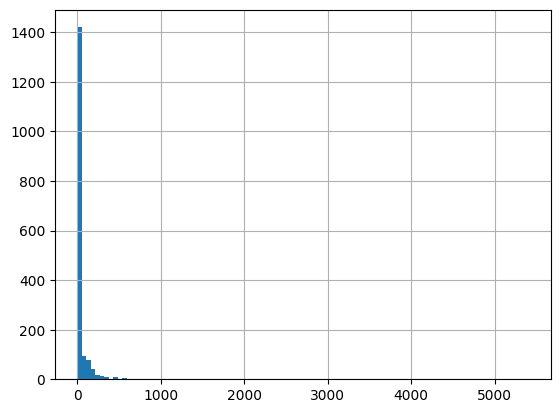

In [56]:
count_new_genres_popularity.hist(bins=100)

#### Ad 2. Tłumaczenie wszystkich gatunków do wspólnego języka

Najpierw za pomocą biblioteki *Lingua* zostanie określony język nazwy każdego gatunku muzycznego:

In [1]:
from lingua import LanguageDetectorBuilder
detector = LanguageDetectorBuilder.from_all_languages().build()
genre_lang = {genre: detector.detect_language_of(genre).iso_code_639_1.name for genre in list(genres_df.keys())}

NameError: name 'genres_df' is not defined

Do przetłumaczenia wykorzystana zostanie biblioteka *DeepL*. Każda kategoria zostanie przetłumaczona na język angielski.

In [ ]:
import deepl

auth_key = "8780381e-9354-927d-ff53-d87b77f69fce:fx" 
translator = deepl.Translator(auth_key)

english_genres = [] 
for genre, lang in genre_lang.items():
    if lang != "EN":
        try:
            english_genres.append(translator.translate_text(genre, target_lang="EN-US", source_lang=lang).text.lower())
            continue
        except deepl.DeepLException:
            pass
    english_genres.append(genre)

Korzyścią tego rozwiązania byłoby usunięcie 26 gatunków. Są jednak potencjalne gatunki niepoprawnie przetłumaczone. W tym przypadku lepszym rozwiązaniem będzie pozostawienie wszystkich gatunków w różnych językach.

In [ ]:
len(english_genres) - len(set(english_genres))

26

#### Ad 3. Usunięcie gatunków rzadkich

Wartością progową będzie 25 artystów, reprezentujących dany gatunek - w innym przypadku gatunek zostanie usunięty ze zbioru danych.

In [ ]:
unpopular_genres = list(count_new_genres_popularity[count_new_genres_popularity < 10].keys())
genres_df.drop(unpopular_genres, axis=1, inplace=True)
genres_df

,a cappella,accordion,adoracao,adoracion,adult standards,afrikaans,afrobeat,afrofuturism,afropop,album rock,...,volkspop,wave,world,worship,wrestling,ye ye,yodeling,zillertal,zolo,zouk
id,,,,,,,,,,,,,,,,,,,,,
72578usTM6Cj5qWsi471Nc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7b6Ui7JVaBDEfZB9k6nHL0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5wJ1H6ud777odtZl5gG507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0n4a5imdLBN24fIrBWoqrv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4gdMJYnopf2nEUcanAwstx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3yMpPk98o4yrKhUr9rB0yY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ICqrGUqDv9KZdbbFiNGma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7JXwnoNAAY276k8wZVmpYf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Liczba artystów bez gatunku to ok. 3% całego zbioru - jest to akceptowalna strata.

In [ ]:
genres_per_artist = genres_df.sum(axis=1)
len(genres_per_artist[genres_per_artist == 0])

789

Poniższy kod tworzy nową kategorię - *other* - na artystów, których gatunki zostały usunięte.

In [ ]:
genres_df["other"] = 0
genres_df.loc[genres_df.sum(axis=1) == 0, "other"] = 1
genres_df

,a cappella,accordion,adoracao,adoracion,adult standards,afrikaans,afrobeat,afrofuturism,afropop,album rock,...,wave,world,worship,wrestling,ye ye,yodeling,zillertal,zolo,zouk,other
id,,,,,,,,,,,,,,,,,,,,,
72578usTM6Cj5qWsi471Nc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7b6Ui7JVaBDEfZB9k6nHL0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5wJ1H6ud777odtZl5gG507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0n4a5imdLBN24fIrBWoqrv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4gdMJYnopf2nEUcanAwstx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3yMpPk98o4yrKhUr9rB0yY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5ICqrGUqDv9KZdbbFiNGma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7JXwnoNAAY276k8wZVmpYf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Histogram:

<Axes: >

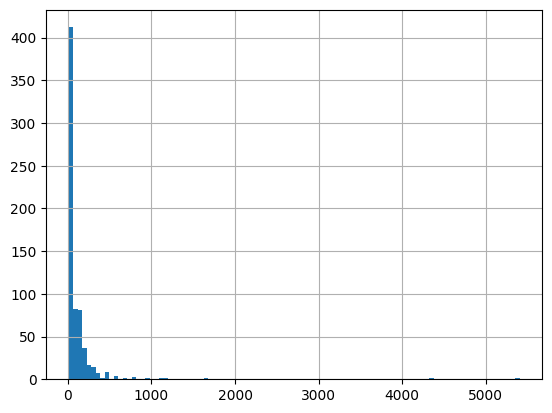

In [ ]:
genres_df.sum().hist(bins=100)